In [1]:
import glob
import argparse
import datetime
import os
from os.path import basename, dirname, join
from operator import itemgetter
import random

import numpy as np
import matplotlib.pyplot as plt

from data_generator import DataGeneratorFrom_npz_File

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-0692cdn9 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
concentration_scale = [0, 1, 2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 91, 92]
sod_scale = [0, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 93, 95, 96, 97, 98]
form_scale = [i for i in range (22)]+[99]
list_combinations =[]
for sod in sod_scale :
    for form in form_scale :
        name_comb = str(sod)+'_'+str(form)
        list_combinations.append(name_comb)

In [3]:
npz_files = sorted(glob.glob('/Data/analysis/output_summary/*all_npz.npz'))

In [46]:
def creation_matrix_combi_con(npz_files, list_combination, concentration_scale, dist_thresholds, visualization=False):    
    """
    This function creates a graph. 
    It represents the frequency of each combination according to concentration.
    In addition, if the distance to the zone is too small (below the threshold)
    then the data from the zone will not be taken into account.
    
    Parameters
    ----------
    npz_files : list
        all npz files in the folder.
    list_combination : list
        list of the all possible combinations.
    concentration_scale : list
        list that contains all the levels of concentration according to ASID-v2 manual.
    dist_thresholds : integer
        minimum border distance threshold.
    visualization : boolean
        if it makes graphiques.
    
    Returns
    -------
    result : list
        list of combinations and their frequencies for each concentration.
    """
    #initialization
    x_length = len(list_combination)
    y_length = len(concentration_scale)
    sol = np.zeros((y_length, x_length))
    list_logical_graph=[True]*len(list_combinations)
    list_index_combination_present = []
    list_combination_present = []
    
    #creation of the matrix
    for npz_file in npz_files:
        list_output = np.load(npz_file)['array']
        for output in list_output :
            if (output[10] > dist_thresholds) : # if the distance of the output is below the threshold, we don't keep
                for ice in range(3): # in a output there are 3 data for the 3 most present ice
                    if output[1+ice*3]==(-9): 
                        continue
                    if output[2+ice*3]==(-9): 
                        continue
                    if output[3+ice*3]==(-9): 
                        continue
                    combi = str(int(output[2+ice*3])) + '_' + str(int(output[3+ice*3]))
                    index_con = concentration_scale.index(int(output[1+ice*3]))
                    index_comb= list_combination.index(combi)
                    sol[index_con][index_comb] += 1
                    list_logical_graph[index_comb]=False
                    if index_comb not in list_index_combination_present :
                        list_index_combination_present.append(index_comb)
                    
    
    
    #combination present
    list_ind_comb_present_sort = sorted(list_index_combination_present)
    for ind in list_ind_comb_present_sort :
        list_combination_present.append(list_combination[ind])
    print(list_combination_present)
    
    
    #Cleanning
        # matrix cleanning
    sol1 = sol.compress(np.logical_not(list_logical_graph), axis =1)
    sol1 = np.asarray(sol1, dtype = int)
        # cleanning of the return 
    sol_return =[]
    c=0
    for combi in list_combination_present :
        sol_return.append([combi, sol1[:,c]])
        c += 1
    print(sol_return)
        
    # visualization
    if visualization :
        plt.imshow(sol1)
        plt.colorbar()
        plt.title('Frequency of combinations depending on concentration')
        plt.xlabel('Combinations (Sod_form)')
        plt.ylabel('Concentration')
        plt.show()
    return sol

['81_2', '81_99', '82_2', '82_3', '82_4', '82_5', '82_6', '83_2', '83_3', '83_4', '83_5', '83_6', '83_8', '84_3', '84_4', '84_6', '85_4', '87_2', '87_3', '87_4', '87_5', '87_6', '87_7', '87_8', '91_2', '91_3', '91_4', '91_5', '91_6', '91_7', '91_8', '93_2', '93_3', '93_4', '93_5', '93_6', '93_7', '93_8', '95_2', '95_3', '95_4', '95_5', '95_6', '95_7', '95_8', '96_3', '96_4', '96_5', '96_6', '96_7', '97_4', '97_5', '97_6', '97_7', '98_8', '98_10']
[['81_2', array([ 0,  0,  0,  0,  0, 99,  0,  0,  0,  0,  0,  0,  0,  0])], ['81_99', array([    0,     0,     0, 21463,  5185,   866,     0,     0,     0,
           0,     0,     0,     0,     0])], ['82_2', array([   0,    0,    0,  901, 2699,   71,    1,    0,    0,    0,    0,
          0,    0,    0])], ['82_3', array([    0,     0,     0,  2152, 12294,  1918,  1541,     3,     0,
           0,     0,     0,     0,     0])], ['82_4', array([   0,    0,    0, 5194, 8709, 3447, 3011,    0, 2834,    0,    0,
          0,    0,    0])], ['82

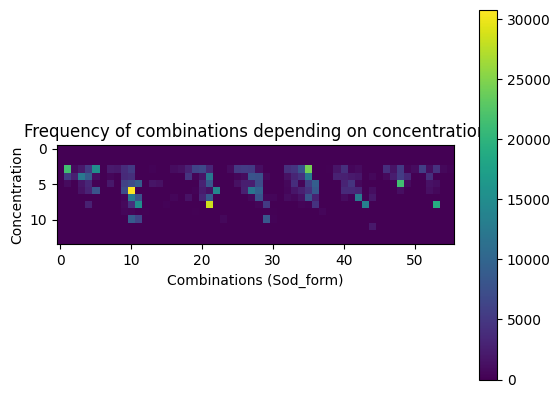

In [47]:
array = creation_matrix_combi_con(npz_files, list_combinations, concentration_scale, 100, visualization=True)